# A dust model

In this tutorial we will simulate a fictitious radioactive tracer that is injected into the ocean by the 200 largest rivers (by estaimated discharge).
The 200 major rivers are available from within the AIBECS.
Once "born", our tracer will decay with a parameter timescale $\tau$ as it flows through ocean basins.

The 3D tracer equation is:

$$\left[\frac{\partial}{\partial t} + \nabla \cdot (\boldsymbol{u} + \mathbf{K}\nabla)\right] x = s_\mathsf{rivers} - x / \tau$$

where $\nabla \cdot \left[ \boldsymbol{u} - \mathbf{K} \nabla \right]$ represents the ocean circulation transport.
(Tracer transport operators are described in the documentation.)
The riverine source of the tracer is $s_\mathsf{rivers}$, and it decays with rate $x / \tau$.

In AIBECS, we must recast this equation in the generic form

$$\left[\frac{\partial}{\partial t} + \mathbf{T}(\boldsymbol{p})\right] \boldsymbol{x} = \boldsymbol{G}(\boldsymbol{x},\boldsymbol{p}).$$

We start by telling Julia we want to use the AIBECS and the OCIM0.1 transport matrix for the ocean circulation.

In [1]:
using AIBECS
grd, T_OCIM = OCIM0.load()

┌ Warning: Over-writing registration of the datadep
│   name = AIBECS-OCIM0.1
└ @ DataDeps /Users/runner/.julia/packages/DataDeps/gbyoa/src/registration.jl:15
┌ Info: You are about to use the OCIM0.1 model.
│ If you use it for research, please cite:
│ 
│ - Primeau, F. W., Holzer, M., and DeVries, T. (2013), Southern Ocean nutrient trapping and the efficiency of the biological pump, J. Geophys. Res. Oceans, 118, 2547–2564, doi:10.1002/jgrc.20181.
│ - DeVries, T. and F. Primeau, 2011: Dynamically and Observationally Constrained Estimates of Water-Mass Distributions and Ages in the Global Ocean. J. Phys. Oceanogr., 41, 2381–2401, doi:10.1175/JPO-D-10-05011.1
│ 
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Primeau_2011" and "Primeau_etal_2013" keys.)
└ @ AIBECS.OCIM0 /Users/runner/work/AIBECS.jl/AIBECS.jl/src/OCIM0.jl:67


(, 
  [1     ,      1]  =  3.43554e-7
  [2     ,      1]  =  6.15762e-8
  [57    ,      1]  =  -2.61541e-7
  [10172 ,      1]  =  -7.12375e-7
  [10229 ,      1]  =  5.46158e-7
  [1     ,      2]  =  -1.09408e-7
  [2     ,      2]  =  3.1285e-7
  [3     ,      2]  =  1.98074e-9
  [58    ,      2]  =  -2.42077e-8
  ⋮
  [191168, 191167]  =  -1.81561e-7
  [190655, 191168]  =  -2.32625e-8
  [191165, 191168]  =  -1.08131e-7
  [191167, 191168]  =  1.42112e-7
  [191168, 191168]  =  6.11855e-8
  [191169, 191168]  =  -7.25416e-8
  [190656, 191169]  =  -1.80874e-9
  [191166, 191169]  =  -7.12552e-8
  [191168, 191169]  =  3.23538e-8
  [191169, 191169]  =  4.07233e-8)

The transport is

In [2]:
T_radiorivers(p) = T_OCIM

T_radiorivers (generic function with 1 method)

For the radioactive decay, we simply use

In [3]:
function decay(x, p)
    @unpack τ = p
    return x / τ
end

decay (generic function with 1 method)

To build the river sources, we will load the geographic locations and discharge (in m<sup>3</sup> s<sup>-1</sup>) from the [Dai and Trenberth (2017) dataset](https://rda.ucar.edu/datasets/ds551.0/index.html#!description).

In [4]:
RIVERS = Rivers.load()

┌ Info: You are about to use the Dai and Trenberth river discharge dataset.
│ If you use it for research, please cite:
│ 
│ - For the dataset itself: Dai, A. 2017. Dai and Trenberth Global River Flow and Continental Discharge Dataset. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. https://doi.org/10.5065/D6V69H1T.
│ - For the formal publication that describe the dataset: Dai, A., and K. E. Trenberth, 2002: Estimates of freshwater discharge from continents: Latitudinal and seasonal variations. J. Hydrometeorol., 3, 660–687.
│ - For descriptions of updates to the dataset:
│     - Dai, A., T. Qian, K. E. Trenberth, and J. D Milliman, 2009: Changes in continental freshwater discharge from 1948-2004. J. Climate, 22, 2773–2791.
│     - Dai, A., 2016: Historical and future changes in streamflow and continental runoff: A review, in Terrestrial Water Cycle and Climate Change: Natural and Human-Induced Impacts, Geophysical

200-element Array{AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}},1}:
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Amazon", -55.5, -2.0, 210472.27926078028 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Congo", 15.3, -4.3, 41448.018860749864 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Orinoco", -63.6, 8.1, 35775.851142038686 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Changjiang", 117.6, 30.8, 29913.55489644333 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Brahmaputra", 89.7, 25.2, 19900.119147210182 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}}("Mississippi", -90.9, 32.3, 19329.73356655766 m³ s⁻¹)
 AIBECS.Rivers.River{Quantity{Flo

This is an array of rivers, for which the type`River{T}` contains the river's name, lat–lon coordinates, an discharge in m<sup>3</sup> s<sup>-1</sup>.

We can regrid these into the OCIM0.1 grid and return the corresponding vector with

In [5]:
rivers = regrid(RIVERS, grd)

191169-element Array{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}},1}:
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
          ⋮
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹

(Note this regridding uses [NearestNeighbors.jl](https://github.com/KristofferC/NearestNeighbors.jl) to assigne a wet box as the mouth of each river, which sometimes is not exactly the real loaction of the mouth.)
We then normalize the river discharge globally to control the global magnitude of the riverine sources with a single parameter, $\sigma$ (in mol s<sup>-1</sup>.
We want $\int s_\mathsf{rivers} dV = \sigma_\mathsf{rivers}$ (in mol s<sup>-1</sup>).
We want to write it as $s_\mathsf{rivers} = \sigma_\mathsf{rivers} s_\mathsf{rivers}'$, so $\int s_\mathsf{rivers}' dV = 1$. In Julia/AIBECS, this is equivalent to `v's_rivers′ == 1` where `v` is the vector of volumes. Thus, we do

In [6]:
v = vector_of_volumes(grd)
s_rivers′ = rivers / (v'rivers)

191169-element Array{Quantity{Float64,𝐋⁻³,Unitful.FreeUnits{(m⁻³,),𝐋⁻³,nothing}},1}:
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
       ⋮
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³
 0.0 m⁻³

assuming
and scale

In [7]:
function s_rivers(p)
    @unpack σ = p
    return σ * ustrip.(s_rivers′) # we must remove the units in AIBECS here :(
end

s_rivers (generic function with 1 method)

We then write the generic $\boldsymbol{G}$ function, which is

In [8]:
G_radiorivers(x,p) = s_rivers(p) - decay(x,p)

G_radiorivers (generic function with 1 method)

##### Parameters

We specify some initial values for the parameters and also include units.

In [9]:
import AIBECS: @units, units
import AIBECS: @initial_value, initial_value
@initial_value @units struct RadioRiversParameters{U} <: AbstractParameters{U}
    τ::U        | 5.0 | u"yr"
    σ::U        | 1.0 | u"Gmol/yr"
end

initial_value (generic function with 29 methods)

Finally, thanks to the initial values we provided, we can instantiate the parameter vector succintly as

In [10]:
p = RadioRiversParameters()


│ Row │ Symbol │ Value   │ Initial value │ Unit      │
│     │ Symbol │ Float64 │ Float64       │ FreeUnit… │
├─────┼────────┼─────────┼───────────────┼───────────┤
│ 1   │ τ      │ 5.0     │ 5.0           │ yr        │
│ 2   │ σ      │ 1.0     │ 1.0           │ Gmol yr⁻¹ │

We generate the state function `F` and its Jacobian `∇ₓF`,

In [11]:
F, ∇ₓF = state_function_and_Jacobian(T_radiorivers, G_radiorivers)

(AIBECS.var"#F#35"{typeof(Main.##317.T_radiorivers),typeof(Main.##317.G_radiorivers)}(Main.##317.T_radiorivers, Main.##317.G_radiorivers), AIBECS.var"#∇ₓF#37"{typeof(Main.##317.T_radiorivers),AIBECS.var"#∇ₓG#36"{typeof(Main.##317.G_radiorivers)}}(Main.##317.T_radiorivers, AIBECS.var"#∇ₓG#36"{typeof(Main.##317.G_radiorivers)}(Main.##317.G_radiorivers)))

generate the steady-state problem,

In [12]:
nb = sum(iswet(grd))
x = ones(nb) # initial guess
prob = SteadyStateProblem(F, ∇ₓF, x, p)

SteadyStateProblem with uType Array{Float64,1}
u0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

and solve it

In [13]:
s = solve(prob, CTKAlg()).u * u"mol/m^3"

191169-element Array{Quantity{Float64,𝐍 𝐋⁻³,Unitful.FreeUnits{(m⁻³, mol),𝐍 𝐋⁻³,nothing}},1}:
 -2.0359560558640746e-11 mol m⁻³
 -2.2762708227553403e-11 mol m⁻³
 -2.3025178408196758e-11 mol m⁻³
  -2.580362885022787e-11 mol m⁻³
 -1.2917010319700967e-11 mol m⁻³
   5.016257171901937e-12 mol m⁻³
  4.6335192031518866e-11 mol m⁻³
  2.5210792646619313e-10 mol m⁻³
   -5.81780308479133e-12 mol m⁻³
 -1.9487292831073043e-10 mol m⁻³
                               ⋮
   6.866568191418031e-13 mol m⁻³
   8.309101167794328e-14 mol m⁻³
   7.713241234650408e-14 mol m⁻³
  4.2090503168590185e-15 mol m⁻³
   6.241313155586795e-14 mol m⁻³
   -6.05235419165412e-14 mol m⁻³
  -3.466547434206538e-13 mol m⁻³
  -8.408728976615311e-14 mol m⁻³
    1.50153136811152e-14 mol m⁻³

Let's now run some vizualizations using the Plots.jl recipes.

In [14]:
using Plots

Let's have a look at the distribution layer by layer.
At 100m,

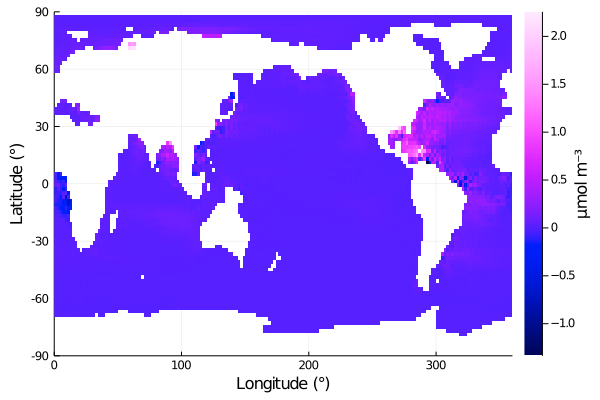

In [15]:
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=100, color=:linear_bmw_5_95_c89_n256)

and 500m.

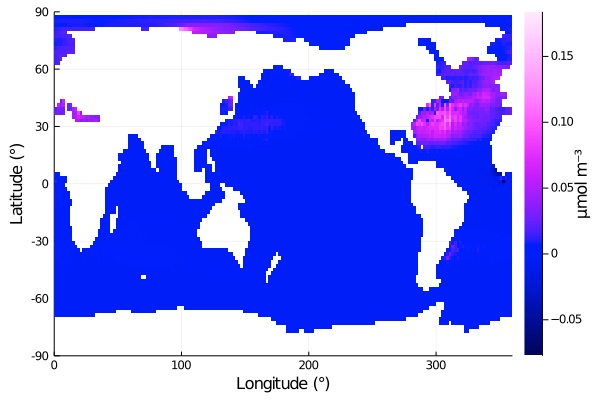

In [16]:
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=500, color=:linear_bmw_5_95_c89_n256)

Or we can change the timescale and watch the tracer fill the oceans.

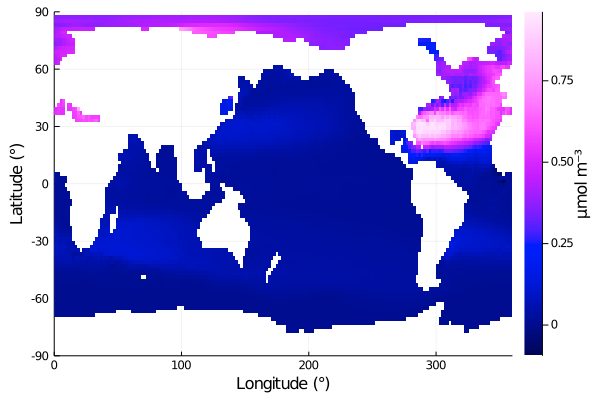

In [17]:
p = RadioRiversParameters(τ = 50.0u"yr")
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s_τ50 = solve(prob, CTKAlg()).u * u"mol/m^3"
plothorizontalslice(s_τ50, grd, zunit=u"μmol/m^3", depth=500, color=:linear_bmw_5_95_c89_n256)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*